<h1>Math</h1>

In this notebook we are going to discuss Sequence-to-Sequence models or Seq-Seq for short

---

<h3>Sequence-to-Sequence</h3>

As usual, we start our Math section with some motivation, what problem are we trying to solve here ?

We alluded to this problem before, and now we are going to consider it in full

Suppose we are working on a machine translation system, and we want to be able to translate English to Japanese or English to Spanish

Well, we know that the number of characters/words in the English sequence is not going to be the same as the number of characters/words in the Japanese sequence

<img src='extras/35.1.PNG' width='300'></img>

But in our study of RNNs so far, we always get one hidden state per input, and that always translate to one output per input

In other words, with the standard RNN, 

<img src='extras/35.2.PNG' width='100'></img>

if we keep all the outputs at each point of time, our output length is always going to be the same as our input length

---

The solution to this problem, is the Seq-to-Seq architecture

At a high level, its actually a very simple concept

So the main architecture is a dual RNN system

<img src='extras/35.3.PNG' width='700'></img>

The first RNN which takes in the input, is called the encoder

The second RNN which produces the translation, or really any answer, is called the decoder

note : we will be talking about specific applications later on such as translation, answering questions, conversation agents and so on

As we may recall this is not the first time we have seen an Encoder/Decoder architecture (actually it is due to lack of organisation in notebooks' order :) )

We saw the same type of thing when we looked at Autoencoders,GANs and so forth (search for them in future notebooks)

So this is a very common idea in deep learning

We take some raw input, like text,audio, or an image, and we create a little vector representation out of it, in this case thats the RNN state

Then in the second stage, the decoder, we produce new data from that compressed vector representation

So this type of architecture, can be used for any type of request-response type of task

The most basic of which, is an autoencoder where we just try to reproduce what we put in

---

<h3>The Encoder</h3>

So if we zoom in a little, how does this work ?

Lets just consider the Encoder for now

<img src='extras/35.4.PNG' width='400'></img>

This just works like the standard RNN, whether that be an LSTM or a GRU

We pass in the input sequence, and we get back a series of $h$s

Importantly, with Seq-to-Seq, we only want to keep the last state of the sequence 

For an LSTM that would be $h_T$ and $c_T$, but for a GRU that would just be $h_T$

In general, when we show these diagrams, we are just going to show $h$ for simplicity sake

So in Keras, that means we would pass in ```return_sequences=False```  (default anyway)


So what that gives us is $h_T$, which is a vector of size $M$

we can think of this as a <strong>Thought Vector</strong>

This one vector, which by the way does not contain any time information in and of itself, is just a single vector that somehow represents the input sentence

Thats why we call is an encoding, its a small compact representation of the original input

---

<h3>The Interface</h3>

Another way to think of the encoder and decoder is this

Imagine that the Encoder's job is to fold up the input sequence into a small informative vector

Then the Decoder's job is to unravel or unfold that vector into a new sequence

<img src='extras/35.5.PNG' width='500'></img>

The idea of Folding & Unfolding effeciently captures what happens to our input data as we pass it between the Encoder and the Decoder

---

<h3>The Decoder</h3>

Now lets consider what happens at the Decoder's side

So this is the novel part of the Seq-to-Seq architecture

At the Decoder we have an entirely new RNN unit, but with the same size as the Encoder RNN

The reason we want to do this is, instead of passing in any old initial state into the decoder RNN, we are going to pass in our Thought Vector from eariler

So we can think of this as $h_0^\prime$ for the decoder RNN, but its really just equal to the old $h_T$ from the old RNN

For the first input $x_1$, we pass in a special token to denote the start of a sentence 

Typically we pass in ```<SOS>```, so we to remember to add those to our training set as well

Now from this information, $h_0$ and $x_1$, our RNN is going to calculate $h_1$ and from that we can calculate $y_1$

<img src='extras/35.6.PNG' width='500'></img>

$y_1$ of course will be a vector of probabilities, so from their we can take the argmax to pick the most likely word in our target language

---

From this we are going to do something really interesting

We might wonder, how can we predict the second word in the sentence and the third word and so on

Well consider the fact that we now have somewhat of a hole in our model

Our RNN has to take two things, the previous state, which is now $h_1$, which we just calculated and $x_2$ some kind of input

Well, what if we just pass in the argmax of $y_1$ as $x_2$, and then we calculate $y_2$ and pass that in as the input to $x_3$ and so on

so $y_1$ becomes $x_2$, $y_2$ becomes $x_3$, $y_3$ becomes $x_4$ and so on, so we get to the maximum length seqeunce

<img src='extras/35.7.PNG' width='500'></img>

note : Dense Layer comes after the LSTM with output size = $V$

---

<h3>Where have we seen this ?</h3>

So where have we seen this type of thing before ?

Well what this gives us is a language generation model !

<img src='extras/35.8.PNG' width='500'></img>

Which is something we are very comfortable with because we have studied it number of times in the past

Our usual example is poerty generation, so we learn some probabilistic model of a set of poems and from that we can generate new poems

---

<h3>Seq2Seq Summary</h3>

So thats the basic idea behind Seq2Seq

It allows us to solve the problem of mapping an input sequence to an output sequence that has a different length

Its very simple when we draw it out on paper

<img src='extras/35.9.PNG' width='500'></img>

Although we see that the code is non-trivial

note :  for our implementation later, we are going to be doing machine translation

We can grab the data from the <a href='http://www.manythings.org/anki/'>here</a>

Note that there are alot of teanslation datasets on this site such as English-to-Spanish, English-to-French,English-to-Russian and so on

Since $\text{All the data is the same}$, we can pick anyone we want, the same code will work on any of these data files

We will be using English-to-Arabic dataset

<h1>Math</h1>

Now we are going to talk about some applications of the Seq2Seq architecture

---

<h3>Seq2Seq Applications</h3>

This is rather important since we often mention that $\text{All data is the samme}$

This is a very powerful perspective, because if allows us to generalise our skills to new problem domains and it allows us to save time because we dont need to relearn the same thing over and over again

We can just as easily build an image classifier as we can a spam detector both using the CNN

Being able to generalise these ideas is very helpful

---

<h3>What tasks "look like" machine translation ?</h3>

So earlier we talked about machine translation

What are other tasks for which our data looks exactly the same ?

Another popular task is called question answering 

This is a task where, we are told some story, and then we are asked a question about the story, and to demonstrate that we comprehend the story we give the correct answer

So its a test of reading comprehension

As an example, we may be given the Wikipidea page on Albert Einstein and then we might be given a question like Q:"What theory is Albert Einstein best known for?", and the neural network might output A:"Relativity" 

The idea here is, we pass in the entire story and the question as a contiguous (concatenated) sequence of words, and then that gets converted into a thought vector and then that gets converted into an answer at the decoder

So we can imagine what a dataset like this would look like, it would be just liek a machine translation dataset

We have an input sequence of words, and a target sequence of words and we just train the neural network to remember these pairs

---

<h3>Chatbots</h3>

Another popular example is chatbots

Again, this dataset takes the exact saem format

We say something to the chatbot, and then it gives us an appropriate response back

So both chatbots and question answering take on  this request-response format, same as neural machine translation

we input a sequence of words and it gives us back a sequence of words

But we may argue that the Seq2Seq model in not ideally suited for chatbots (intructor's comment, his explanation follows)

Lets explain why

When we are having a conversation with someone, often we are conversing over a particular idea over the span of multiple questions and statements, that what a regular conversation looks like

A conversation with only binary questions and answers would be akward and would have no flow

In other words, a decent chatbot, should have some ability to remember, not only what we said in the past, but also what is has said itself

Thats what we do when we are having a conversation, and it makes sense that a true conversational chatbot should be able to do that too

so, we may argue that Seq2seq architectures are good for chatbots, because we are not teaching the neural network to actually have a conversation

We are just teaching it to memorise what are essentially, question and answer pairs

<h1>Math</h1>

Now, we are going to look at decoding in detail
 
---

<h3>Decoding in Detail</h3>

Remember that decoding is the second part in the Seq2Seq architecture

<img src='extras/35.10.PNG'></img>

What's difficult about this, that we may not have realised from just the basic high level description, is that there are some implementation details we need to pay attention to in order to actually get our Decoder to work

---

<h3>Implementation Issues</h3>

One major issue is this, earlier we looked at how to implement an RNN in Keras

One big difference between how we are doing things now vs how we did them before, is that we are now working with constant size sequences

This does not seem like a problem at first, but it becomes clearer when we look at a picture

<img src='extras/35.11.PNG' width='700'></img>

Remember that each RNN unit has two inputs and an output, if we consider the previous hidden state to be an input

So we have our Encoder-Decoder, and our input sentence goes into the encoder RNN

The outputs of the Encoder RNN actually get ignored, since all we want from that is the final hidden state

For the Decoder RNN, we take the outputs and we compare these to the target sentence, which in the case of machine translation is just the input sentence translated into whatever language we want to learn

So now here is the problem

We know that the decoder RNN has two inputs, the previous hidden state and an input sequence

But what goes at the bottom $?$

---

<h3>What we've seen</h3>

In the previous Math section, we claimed that what we would do is take the previously generated word and feed that into the input at the next time step

<img src='extras/35.12.PNG' width='400'></img>

The researchers have found that, for training, there is something that works even better <strong>Teacher Forcing</strong>

---

<h3>Teacher Forcing</h3>

Teacher forcing works like this, instead of feeding the previously generated input into the bottom of the decoder, we instead feed in the true previous word

<img src='extras/35.13.PNG' width='400'></img>

so even if our model did not get the previous word right, teacher forcing corrects it so the model can predict the next word based on the real translation

---

<h3>Why ?</h3>

This helps the model to train because, as we can imagine, it wouldd be difficult for the model to learn the entire sentence at once

If we think about how <u>we</u> learn a language, it would be very similar to that

suppose we are trying to form a sentence, and we are just saying one word at a time trying to put it all together

If we get a word wrong, our teacher might correct us, and then we can use that information to finish the rest of the sentence

This is helpful because, if we get a word wrong and nobody corrects us, then all our future predictions will now be based on that first incorrect word which would just throw everyting off

---

<h3>Teacher forcing</h3>

So schematically, we now want to pass in the true target sequence into the bottom of the decoder

But remember it has to be offset by one so that at the target, we are always trying to predict the next word

If they are aligned perfectly then the decoder would just learn to copy its input which is useless

---

<h3>The Problem</h3>

But now we have a problem, and this goes back to what we were discussing at the beginning of this lecture

We know that keras works with constant size sequences, so if our input is of length 100, then our output will also be of length 100

The problem is what do we do when we want to make new predictions at test time ?

During training, we are always going to pass in the true target into the bottom of the decoder, but for testing we obviously cant do that

---

<h3>Test Mode</h3>

For testing, we go back to the original architecture where we pass in the previous output into the next input

<img src='extras/35.14.PNG' width='400'></img>

The problem with this is that, if we look at this RNN unit, its input sequenc length is 1

So for prediction, the input sequence length is always going to be 1

This is because we will be doing a loop and generating each loop one at a time

we must do it this way, because we cant pass in the full sequence at once, that does not make sense because we have not generated it yet

---

<h3>The Problem (Summarised)</h3>

So to summarise this issue into just few sentences

<ol>
    <li>Keras must have constant-sized inputs</li>
    <li>Decoder input length during training is $T_y$ if we are using teacher forcing</li>
    <li>The decoder input size during prediction is of size 1</li>
</ol>

2 and 3 are in conflict with 1

so how do we solve this problem ?

---

<h2>The Solution</h2>

Well the answer is to simply create two different models!

The first model we create will be for training purposes only

The second model we create will be for sampling, and we will make use of the previously defined decoding layers that were already part of the trained model

So for the second model, we can define a new set of inputs, and for these inputs, the inut length will be 1

Here is a psuedocode

```python
emb = Embedding()
lstm = LSTM()
dense = Dense()

input1 = Input(length=Ty)
model1 = Model(input1,dense(lstm(emb(input1))))

input2 = Input(length=1)
model2 = Model(input2,dense(lstm(emb(input2))))

h = encoder model output
x = <SOS>

for t in range(Ty):
    x,h = model2.predict(x,h)

```

So we can see that both models , model 1 and model 2,  both use the same layers that were defined at the beginning

The only difference between the two models is that they have a different input

And so the code for generating a translation is basically just the for loop



<h1>Math</h1>

Now, we are going to take a little bit of a digression and revisit the idea of poerty generation

---

<h3>Poetry Revisited</h3>

This is partly a review and partly not a review because we have done poetry generation in the past but we have not done it in keras

And so thats going to introduce some interesting details that we have to pay attention to

Now obviously, we are not doing this for no reason

This is going to teach us the skills we need to complete our Seq2Seq model

Plus generating Art with deep learning is just cool!

So we should be interested in doing it

---

<h3>Language Modelling</h3>

In the previous section, we looked at the decoder side of the Seq2Seq architecture in detail, becasue thats basically everything we need to know in order to build a poetry generation model in keras

<img src='extras/35.15.PNG' width='400'><img>

If we think about it at a high level, poetry generation is just an instance of language modelling

If we recall, language modelling just means next word prediction

So we want to calculate $p(w_t | w_{t-1},w_{t-2})$

---

<h3>Structure of Data</h3>

The general model for this, is an RNN, with the target sequence being just the input sequence offset by one

<table>
    <tr>
        <td><strong>Input</strong></td>
        <td> $<$SOS$>$ </td>
        <td>The</td>
        <td>quick</td>
        <td>brown</td>
        <td>fox</td>
    </tr>
        <tr>
        <td><strong>Target</strong></td>
        <td>The</td>
        <td>quick</td>
        <td>brown</td>
        <td>fox</td>
        <td> $<$EOS$>$ </td>
    </tr>
</table>

notice how they are both the same length, so its okay to add the ```<SOS>``` and ```<EOS>``` tokens

Building a model like this, teaches the RNN how to predict the next word given all the previous words in a sentence

And so later on, we can generate new sentences by sampling from the probability  distributions at the RNN output

---

<h3>What should this remind us of ?</h3>

This looks exactly like the Seq2Seq Decoder RNN with teacher forcing

As we recall, the input sequence there was the true translation and the target sequence was the same translation offset by one

The only difference between language modelling an Seq2Seq, is that with language modelling the initial hidden state is jsut an arbitary parameter or just 0

With Seq2Seq, the initial hidden state in the decoder is the output of the encoder

other than that, these two problems have the exact same architecture

---

<h3>Conclusion</h3>

So this is why we want to review poetry generation again

Its because poetry generation, or more generally language modelling, requires precisely the same code as the decoder RNN of a Seq2Seq model

So by doing poetry generation first, we learn all of the little Keras tricks we need in order to build the second half of Seq2Seq

Then when we actually write Seq2Seq in code, it wont be so scary looking (hopefully :) )

<h1>Code</h1>

In [1]:
# note : discovered later was running on CPU
# so training time should be shorted

In [17]:
# first we implement only the decoder for the poetry generation task
# then we implement the entire Seq2Seq model for neural machine translation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,LSTM,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from pyarabic.araby import strip_tashkeel
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

In [18]:
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 10000
EMBEDDING_DIM = 300 # we have only one embedding file, D = 300
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 500
LATENT_DIM = 25

In [19]:
# first lets load in the data, as always we can use robert frost poems
# but this time we will try using the Arabic Poetry dataset
# to learn our facourite poet, Antarah Ibn Shaddad
# https://www.kaggle.com/ahmedabelal/arabic-poetry
poems = pd.read_csv('datasets/Arabic Poetry/Arabic_poetry_dataset.csv')
poems.head()

,id,category,poet_name,poem_title,poem_text
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [20]:
poems = poems[poems['poet_name'] == 'عنترة بن شداد']
poems.head()

,id,category,poet_name,poem_title,poem_text
13551,13725,العصر الجاهلي,عنترة بن شداد,دعوني أوفي السيف في الحرب حقه,دَعوني أُوَفّي السَيفَ في الحَربِ حَقَّهُ\nوَأ...
13552,13726,العصر الجاهلي,عنترة بن شداد,لقينا يوم صهباء سريه,لَقينا يَومَ صَهباءٍ سَرِيَّه\nحَناظِلَةً لَهُ...
13553,13727,العصر الجاهلي,عنترة بن شداد,سلوا عنا جهينة كيف باتت,سَلوا عَنّا جُهَينَةَ كَيفَ باتَت\nتَهيمُ مِنَ...
13554,13728,العصر الجاهلي,عنترة بن شداد,قف بالديار وصح إلى بيداه,قِف بِالدِيارِ وَصِح إِلى بَيداه\nفَعَسى الدِي...
13555,13729,العصر الجاهلي,عنترة بن شداد,ذكرت صبابتي من بعد حين,ذَكَرتُ صَبابَتي مِن بَعدِ حينِ\nفَعادَ لِيَ ا...


In [21]:
# now lets take the poems and process them
# we have to take a decision as to whether or not strip tashkeel
# and whether or not to use preatrained word vectors
# so we try twice
# - tashkeel + no embeddings (our preference)
# - tashkeel stripped + pretrained word embeddings (for more practice)
# since word embeddings come without tashkeel 
# its more logical to use them when tahskeel is removed 

# note : already tried stripping tashkeel, results not as good
# lets add another plan

# - tashkeel + pretrained word embeddings

poems = list(poems['poem_text'])
poems = [poem.split('\n') for poem in poems]

X = []
Y = []

for poem in poems:
    for line in poem:
        line = line.rstrip()
        if line:
            # add <sos> token to input sentences
            X.append('<بداية> ' + line)
            # add <eos> token to target sentences
            Y.append(line + ' <نهاية>')

In [22]:
# next we the usual stuff
# tokenising + padding
# we did these a lot before, this is the same code

# next lets tokenise our sentences
# we need to pass filters = '', otherwise special characters are removed
# recall <SOS> and <EOS> have <>
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE,filters='')
tokeniser.fit_on_texts(X+Y)
X = tokeniser.texts_to_sequences(X)
Y = tokeniser.texts_to_sequences(Y)
word2idx = tokeniser.word_index

In [23]:
# next we pad our sentences
max_seq_length = max(len(sent) for sent in X)
max_seq_length = min(max_seq_length,MAX_SEQUENCE_LENGTH)
V = min(len(word2idx)+1,MAX_VOCAB_SIZE)


X = pad_sequences(X,maxlen=max_seq_length,padding='post')
Y = pad_sequences(Y,maxlen=max_seq_length,padding='post')

In [24]:
# now we need to make a custom loss function to filter out the padding
# we dont need our prediction of padding to affect hte loss
# since we are lazy, a shortcut is to one-hot-encode the targets
# and use categorical crossentropy instead of sparse categorical crossentropy
# again , since this is language modelling there is no notion of accuracy
# given the word 'The', there are multiple words that can come next
# so we dont bother making a custom accuracy metric

Y_one_hot = np.zeros((len(Y),max_seq_length,V))

for n in range(len(Y)):
    for t in range(max_seq_length):
        word = Y[n,t]
        if word>0:
            Y_one_hot[n,t,word] = 1

In [9]:
embedding_layer = Embedding(
    V,
    EMBEDDING_DIM,
)

In [10]:
# now we are ready to build our model
# for poetry generation we only build the decoder

# input to decoder during training
input_train = Input(shape=(max_seq_length,))
initial_h = Input(shape=(LATENT_DIM,))
initial_c = Input(shape=(LATENT_DIM,))
x_train = embedding_layer(input_train)

# decoder lstm, used during both train and test
# we set return_state = True
# while we dont need them here, we need them when making predictions
lstm = LSTM(LATENT_DIM,return_sequences=True,return_state=True)
# we set the hidden and cell states because we want to have control over them
# we dont want keras to set them to any old value internally
# when we have our encoder, we will be passing h(T) and c(T) here
x_train,_,_ = lstm(x_train,initial_state=[initial_h,initial_c])

# then we have a dense layer
dense = Dense(V,activation='softmax')
output_train = dense(x_train)
model = Model([input_train,initial_h,initial_c],output_train)

In [12]:
# lets make a learning rate scheduler
# le = 0.005 for first 300 epohcs
# then 0.0005 for next 200 epochs

steps_per_epoch = np.ceil(len(X)*(1-VALIDATION_SPLIT)/BATCH_SIZE).astype('int32')
boundaries = [steps_per_epoch*300]
values = [0.005, 0.005]
learning_rate_fn = PiecewiseConstantDecay(boundaries, values)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate_fn)
)

In [13]:
h_0 = np.zeros((len(X),LATENT_DIM))
c_0 = np.zeros((len(X),LATENT_DIM))
r = model.fit(
    [X,h_0,c_0],Y_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split = VALIDATION_SPLIT
)

Epoch 1/500
22/22 [==============================] - 10s 306ms/step - loss: 5.2739 - val_loss: 4.7471
Epoch 2/500
22/22 [==============================] - 6s 256ms/step - loss: 4.5055 - val_loss: 4.6364
Epoch 3/500
22/22 [==============================] - 5s 249ms/step - loss: 4.1952 - val_loss: 4.7647
Epoch 4/500
22/22 [==============================] - 5s 239ms/step - loss: 4.1661 - val_loss: 4.7652
Epoch 5/500
22/22 [==============================] - 5s 240ms/step - loss: 4.0924 - val_loss: 4.7731
Epoch 6/500
22/22 [==============================] - 5s 236ms/step - loss: 4.0366 - val_loss: 4.7839
Epoch 7/500
22/22 [==============================] - 5s 238ms/step - loss: 3.9908 - val_loss: 4.7950
Epoch 8/500
22/22 [==============================] - 5s 234ms/step - loss: 3.9373 - val_loss: 4.8030
Epoch 9/500
22/22 [==============================] - 5s 228ms/step - loss: 3.9110 - val_loss: 4.8184
Epoch 10/500
22/22 [==============================] - 5s 231ms/step - loss: 3.8690 - val_l

Epoch 161/500
22/22 [==============================] - 5s 222ms/step - loss: 1.2785 - val_loss: 7.3220
Epoch 162/500
22/22 [==============================] - 5s 222ms/step - loss: 1.2667 - val_loss: 7.3146
Epoch 163/500
22/22 [==============================] - 5s 223ms/step - loss: 1.2734 - val_loss: 7.3119
Epoch 164/500
22/22 [==============================] - 5s 222ms/step - loss: 1.2659 - val_loss: 7.3543
Epoch 165/500
22/22 [==============================] - 5s 223ms/step - loss: 1.2537 - val_loss: 7.3937
Epoch 166/500
22/22 [==============================] - 5s 221ms/step - loss: 1.2500 - val_loss: 7.3557
Epoch 167/500
22/22 [==============================] - 5s 223ms/step - loss: 1.2460 - val_loss: 7.3859
Epoch 168/500
22/22 [==============================] - 5s 222ms/step - loss: 1.2379 - val_loss: 7.4534
Epoch 169/500
22/22 [==============================] - 5s 222ms/step - loss: 1.2333 - val_loss: 7.4702
Epoch 170/500
22/22 [==============================] - 5s 222ms/step - lo

22/22 [==============================] - 5s 233ms/step - loss: 0.9757 - val_loss: 10.7297
Epoch 320/500
22/22 [==============================] - 5s 225ms/step - loss: 0.9710 - val_loss: 10.8346
Epoch 321/500
22/22 [==============================] - 5s 227ms/step - loss: 0.9694 - val_loss: 10.6994
Epoch 322/500
22/22 [==============================] - 5s 227ms/step - loss: 0.9696 - val_loss: 10.8467
Epoch 323/500
22/22 [==============================] - 5s 230ms/step - loss: 0.9686 - val_loss: 10.7928
Epoch 324/500
22/22 [==============================] - 5s 229ms/step - loss: 0.9687 - val_loss: 10.8560
Epoch 325/500
22/22 [==============================] - 5s 226ms/step - loss: 0.9676 - val_loss: 10.9195
Epoch 326/500
22/22 [==============================] - 5s 227ms/step - loss: 0.9623 - val_loss: 10.9561
Epoch 327/500
22/22 [==============================] - 5s 227ms/step - loss: 0.9647 - val_loss: 10.9792
Epoch 328/500
22/22 [==============================] - 5s 226ms/step - loss: 0

Epoch 398/500
22/22 [==============================] - 5s 235ms/step - loss: 0.9257 - val_loss: 12.3310
Epoch 399/500
22/22 [==============================] - 5s 235ms/step - loss: 0.9261 - val_loss: 12.2384
Epoch 400/500
22/22 [==============================] - 5s 242ms/step - loss: 0.9288 - val_loss: 12.3386
Epoch 401/500
22/22 [==============================] - 5s 245ms/step - loss: 0.9320 - val_loss: 12.2686
Epoch 402/500
22/22 [==============================] - 5s 237ms/step - loss: 0.9400 - val_loss: 12.4995
Epoch 403/500
22/22 [==============================] - 5s 238ms/step - loss: 0.9388 - val_loss: 12.4245
Epoch 404/500
22/22 [==============================] - 5s 237ms/step - loss: 0.9440 - val_loss: 12.4507
Epoch 405/500
22/22 [==============================] - 5s 245ms/step - loss: 0.9318 - val_loss: 12.5335
Epoch 406/500
22/22 [==============================] - 5s 238ms/step - loss: 0.9345 - val_loss: 12.3693
Epoch 407/500
22/22 [==============================] - 5s 239ms/

Epoch 477/500
22/22 [==============================] - 5s 236ms/step - loss: 0.9054 - val_loss: 13.5294
Epoch 478/500
22/22 [==============================] - 5s 236ms/step - loss: 0.8986 - val_loss: 13.5645
Epoch 479/500
22/22 [==============================] - 5s 236ms/step - loss: 0.9031 - val_loss: 13.6054
Epoch 480/500
22/22 [==============================] - 5s 235ms/step - loss: 0.9083 - val_loss: 13.6862
Epoch 481/500
22/22 [==============================] - 5s 236ms/step - loss: 0.9083 - val_loss: 13.6273
Epoch 482/500
22/22 [==============================] - 5s 236ms/step - loss: 0.9009 - val_loss: 13.6264
Epoch 483/500
22/22 [==============================] - 5s 237ms/step - loss: 0.9026 - val_loss: 13.5865
Epoch 484/500
22/22 [==============================] - 5s 240ms/step - loss: 0.9045 - val_loss: 13.6294
Epoch 485/500
22/22 [==============================] - 5s 237ms/step - loss: 0.9050 - val_loss: 13.6670
Epoch 486/500
22/22 [==============================] - 5s 237ms/

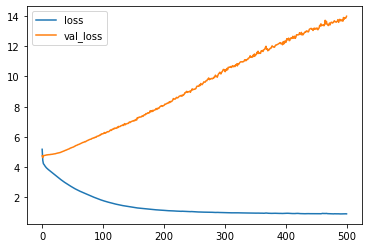

In [14]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [15]:
# now for the test model
input_test = Input(shape=(1))
x_test = embedding_layer(input_test)
h_t = Input(shape=(LATENT_DIM,))
c_t = Input(shape=(LATENT_DIM,))
# now we need the hidden & cell states
x_test,h,c = lstm(x_test,initial_state=[h_t,c_t])
output_test = dense(x_test)

model_test = Model([input_test,h_t,c_t],[output_test,h,c])


In [15]:
# reverse word2idx
idx2word = {v:k for k,v in word2idx.items()}

# generate a line of poetry

def gen_line():
    x = word2idx['<بداية>']
    x = np.array(x).reshape(1,1)
    h_t = np.zeros((1,LATENT_DIM))
    c_t = np.zeros((1,LATENT_DIM))
    
    line = []
    
    for i in range(max_seq_length):
        x,h_t,c_t = model_test.predict([x,h_t,c_t])
        # get probabilities
        x = np.squeeze(x)
        # when the model is not trained enough, sometimes x[0] is too high
        # but we know this does not really correspond to any word (padding)
        # so we set it to 0 then normalise before sampling
        x[0] = 0
        # renomralise x
        x/=x.sum()
        # now sample a word
        x = np.random.choice(len(x),p=x)
        # get word
        word = idx2word[x]
        # make current word x
        x = np.array(x).reshape(1,1)
        if word == '<نهاية>':
            break
        else:
            line.append(word)
    return ' '.join(line)


# generate poem of 4 lines
def gen_poem():
     print('\n'.join(gen_line() for i in range(4)))
    

In [17]:
while True:
    gen_poem()
    print('------------------')
    more = input('Generate Poem [Y/n]: ')
    if more.lower()=='n':
        break
    print('-------------------')

وَاللَهِ ما يُمضي رَسولاً صادِق
أَصفَيتُ وُدّاً مَن أَرادَ هَلاكي
قَطَعتُ رِقابَهُم وَأَسَرتُ مِنهُم في
عَلَيكِ مَقيلي مَفرِقَ يَجودُ
------------------
Generate Poem [Y/n]: Y
-------------------
فَبادِري وَاِنظُري طَعناً لا مُوَلَّهٌ حَيرانُ
وَلَهُ في يَبرُدُ نَظرَةٌ ذِكرُهُنَّ لِخَلقٍ
وِصالٌ وَلا يُلهيهِ مِن حَلِّهِ النَقا لِأَثري
وَالنَصرُ مِن جُلَسائِهِ دونَ ضَمِّكَ وَالعِناقِ
------------------
Generate Poem [Y/n]: Y
-------------------
وَيَومَ البَذلِ نُعطي ما مَلَكن
لَكِ مِنّي إِذا تَنَفَّستُ ذَميمٌ
وَأَنا الأَسوَدُ وَالعَبدُ الَّذي
يا أَبا اليَقظانِ أَغواكَ الطَمَع
------------------
Generate Poem [Y/n]: Y
-------------------
وَمَوكِبٍ خُضتُ أَعلاهُ وَأَسفَلَهُ
زُرتَني تَطلُبُ مِنّي غَفلَةً
تاجِراً يَشتَري النُفوسَ لَحمُه
وَلَم يَطعَن في مِثلُهُ
------------------
Generate Poem [Y/n]: Y
-------------------
وَتَرَكتُها جَزَراً لِمَن ناواها
ذَكَرتُ صَبابَتي مِن بَعدِ حينِ
ماذا أُريدُ بِقَومٍ يَهدُرونَ دَمي
حَمِدتُ تَجَلُّدي وَشكَرتُ صَبري
------------------
Generate Poem [Y/n]: Y

In [16]:
# lets try again without normalising
def gen_line_no_norm():
    x = word2idx['<بداية>']
    x = np.array(x).reshape(1,1)
    h_t = np.zeros((1,LATENT_DIM))
    c_t = np.zeros((1,LATENT_DIM))    
    line = []
    for i in range(max_seq_length):
        x,h_t,c_t = model_test.predict([x,h_t,c_t])
        x = np.squeeze(x)
        x = np.random.choice(len(x),p=x)
        word = idx2word[x]
        x = np.array(x).reshape(1,1)
        if word == '<نهاية>':
            break
        else:
            line.append(word)
    return ' '.join(line)


# generate poem of 4 lines
def gen_poem_no_norm():
     print('\n'.join(gen_line_no_norm() for i in range(4)))

In [21]:
while True:
    gen_poem_no_norm()
    print('------------------')
    more = input('Generate Poem [Y/n]: ')
    if more.lower()=='n':
        break
    print('-------------------')

فَلا يَغشى مَعالِمَهُ ظَلامُ
إِذا لَم يَثِب لِلأَمرِ إِلّا بِقائِدِ
وَلا أُصغي لِقَهقَهَةِ القَناني
وَلَولا سِناني وَالحُسامُ وَهِمَّتي
------------------
Generate Poem [Y/n]: Y
-------------------
أَزَجُّ نَقِيُّ الخَدِّ أَبلَجُ أَدعَجُ
وَيُنعِمُ بِالجِمالِ وَبِالنِياقِ
فَسَيفي وَهَذا الرُمحُ عَمّي عَهدِ
سَتَعلَمُ أَيُّنا يَبقى أَبوكِ نائِبَةً
------------------
Generate Poem [Y/n]: Y
-------------------
أُذَكِّرُ قَومي ظُلمَهُم لي وَبَغيَهُم
وَعُدتُ مِن فِراقِ في مُقَيَّدُ المَلا مِسكٌ يَعيبوا
كَأَنَّ عَلَيهِ حُلَّةَ أُرجُوانِ
تُرى هَذِهِ ريحُ الكَريهَةِ بِلا غِبتِ كَجَهَنَّمٍ
------------------
Generate Poem [Y/n]: Y
-------------------
مِن كُلِّ فَنٍّ لاحَ في الوَغى قاطِعَ الحَدِّ
وَأَجعَلُها مِنَ الدُنيا اِهتِمامي
أَلهو بِما فيهِ مِن فُؤادي لِثامِه
وَأُفني حَواضِرَها وَالبَوادي
------------------
Generate Poem [Y/n]: n


In [53]:
# for someone familiar with Antarah's poetry
# most of these lines are from his actual poems
# which means our model has learned Antarah (to some extent)
# one of my favourites when describing the beauty of Abla (generated above)
# أَزَجُّ نَقِيُّ الخَدِّ أَبلَجُ أَدعَجُ

In [54]:
# now again for option 3 : tashkeel + pretrained word embeddings
# all we need to do is change embedding layer

In [25]:
# next we want to create our embedding matrix
# first we load in the pre trained word vectors
# we can find pretrained word embeddigs for arabic here
# https://fasttext.cc/docs/en/crawl-vectors.html
# we strip the words in word2idx from tashkeel
# search for a key that matches the current word, then place the vector

word2tashkeel = {}

for word in word2idx.keys():
    key = strip_tashkeel(word)
    if key not in word2tashkeel:
        word2tashkeel[key] = []
    word2tashkeel[key].append(word)

file = 'datasets/fasttext ara/cc.ar.300.vec'
word2vec = {}

for i,line in enumerate(open(file,encoding='utf8')):
    line = line.split()
    word = line[0]
    if (i+1)%100000 == 0:
        print((i+1)*100/2000000,'% done')
    if word in word2tashkeel:
        tashkeel_words = word2tashkeel[word]
        vec = np.asarray(line[1:],dtype='float32')
        for tashkeeld in tashkeel_words:            
            word2vec[tashkeeld] = vec

5.0 % done
10.0 % done
15.0 % done
20.0 % done
25.0 % done
30.0 % done
35.0 % done
40.0 % done
45.0 % done
50.0 % done
55.0 % done
60.0 % done
65.0 % done
70.0 % done
75.0 % done
80.0 % done
85.0 % done
90.0 % done
95.0 % done
100.0 % done


In [26]:
V = min(len(word2idx)+1,MAX_VOCAB_SIZE)
# now lets create our embedding matrix
embedding = np.zeros((V,EMBEDDING_DIM))

# # now we fill the matrix with the pretrained word embeddings
# # if a word is not in our pretrained vectors , we leave it as zeros

for word,idx in word2idx.items():
    vec = word2vec.get(word,0)
    if idx < V:
        embedding[idx] = vec

In [27]:
# create embedding layer
embedding_layer = Embedding(
    V,
    EMBEDDING_DIM,
    weights = [embedding],
)

In [28]:
input_train = Input(shape=(max_seq_length,))
initial_h = Input(shape=(LATENT_DIM,))
initial_c = Input(shape=(LATENT_DIM,))
x_train = embedding_layer(input_train)
lstm = LSTM(LATENT_DIM,return_sequences=True,return_state=True)
x_train,_,_ = lstm(x_train,initial_state=[initial_h,initial_c])

# then we have a dense layer
dense = Dense(V,activation='softmax')
output_train = dense(x_train)
model = Model([input_train,initial_h,initial_c],output_train)

In [29]:
steps_per_epoch = np.ceil(len(X)*(1-VALIDATION_SPLIT)/BATCH_SIZE).astype('int32')
boundaries = [steps_per_epoch*300]
values = [0.005, 0.005]
learning_rate_fn = PiecewiseConstantDecay(boundaries, values)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate_fn)
)

In [30]:
h_0 = np.zeros((len(X),LATENT_DIM))
c_0 = np.zeros((len(X),LATENT_DIM))
r = model.fit(
    [X,h_0,c_0],Y_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split = VALIDATION_SPLIT
)

Epoch 1/500
22/22 [==============================] - 10s 318ms/step - loss: 5.2535 - val_loss: 4.7137
Epoch 2/500
22/22 [==============================] - 5s 240ms/step - loss: 4.4830 - val_loss: 4.7004
Epoch 3/500
22/22 [==============================] - 5s 241ms/step - loss: 4.2675 - val_loss: 4.8184
Epoch 4/500
22/22 [==============================] - 5s 241ms/step - loss: 4.2550 - val_loss: 4.8257
Epoch 5/500
22/22 [==============================] - 5s 244ms/step - loss: 4.2229 - val_loss: 4.8388
Epoch 6/500
22/22 [==============================] - 5s 243ms/step - loss: 4.2053 - val_loss: 4.8466
Epoch 7/500
22/22 [==============================] - 6s 254ms/step - loss: 4.1956 - val_loss: 4.8650
Epoch 8/500
22/22 [==============================] - 6s 284ms/step - loss: 4.1592 - val_loss: 4.8762
Epoch 9/500
22/22 [==============================] - 6s 274ms/step - loss: 4.1431 - val_loss: 4.8902
Epoch 10/500
22/22 [==============================] - 6s 270ms/step - loss: 4.1387 - val_l

Epoch 161/500
22/22 [==============================] - 5s 235ms/step - loss: 1.3575 - val_loss: 7.9263
Epoch 162/500
22/22 [==============================] - 5s 242ms/step - loss: 1.3563 - val_loss: 7.9712
Epoch 163/500
22/22 [==============================] - 5s 219ms/step - loss: 1.3504 - val_loss: 8.0011
Epoch 164/500
22/22 [==============================] - 5s 221ms/step - loss: 1.3342 - val_loss: 8.0789
Epoch 165/500
22/22 [==============================] - 5s 220ms/step - loss: 1.3403 - val_loss: 7.9488
Epoch 166/500
22/22 [==============================] - 5s 219ms/step - loss: 1.3324 - val_loss: 8.0413
Epoch 167/500
22/22 [==============================] - 5s 218ms/step - loss: 1.3306 - val_loss: 8.0963
Epoch 168/500
22/22 [==============================] - 5s 218ms/step - loss: 1.3128 - val_loss: 8.1120
Epoch 169/500
22/22 [==============================] - 5s 222ms/step - loss: 1.3103 - val_loss: 8.1734
Epoch 170/500
22/22 [==============================] - 5s 220ms/step - lo

Epoch 319/500
22/22 [==============================] - 5s 219ms/step - loss: 1.0044 - val_loss: 11.8922
Epoch 320/500
22/22 [==============================] - 5s 220ms/step - loss: 0.9979 - val_loss: 11.8694
Epoch 321/500
22/22 [==============================] - 5s 221ms/step - loss: 0.9886 - val_loss: 11.8486
Epoch 322/500
22/22 [==============================] - 5s 220ms/step - loss: 0.9899 - val_loss: 11.8317
Epoch 323/500
22/22 [==============================] - 5s 220ms/step - loss: 0.9948 - val_loss: 11.9576
Epoch 324/500
22/22 [==============================] - 5s 220ms/step - loss: 0.9928 - val_loss: 11.9308
Epoch 325/500
22/22 [==============================] - 5s 221ms/step - loss: 0.9889 - val_loss: 12.0906
Epoch 326/500
22/22 [==============================] - 5s 220ms/step - loss: 1.0037 - val_loss: 12.1172
Epoch 327/500
22/22 [==============================] - 5s 219ms/step - loss: 0.9931 - val_loss: 12.0569
Epoch 328/500
22/22 [==============================] - 5s 221ms/

Epoch 398/500
22/22 [==============================] - 5s 224ms/step - loss: 0.9615 - val_loss: 13.5687
Epoch 399/500
22/22 [==============================] - 5s 236ms/step - loss: 0.9635 - val_loss: 13.6740
Epoch 400/500
22/22 [==============================] - 5s 227ms/step - loss: 0.9547 - val_loss: 13.6529
Epoch 401/500
22/22 [==============================] - 5s 225ms/step - loss: 0.9550 - val_loss: 13.6790
Epoch 402/500
22/22 [==============================] - 5s 226ms/step - loss: 0.9520 - val_loss: 13.7135
Epoch 403/500
22/22 [==============================] - 5s 225ms/step - loss: 0.9506 - val_loss: 13.6950
Epoch 404/500
22/22 [==============================] - 5s 228ms/step - loss: 0.9500 - val_loss: 13.6196
Epoch 405/500
22/22 [==============================] - 5s 227ms/step - loss: 0.9529 - val_loss: 13.6700
Epoch 406/500
22/22 [==============================] - 5s 225ms/step - loss: 0.9508 - val_loss: 13.6570
Epoch 407/500
22/22 [==============================] - 5s 224ms/

Epoch 477/500
22/22 [==============================] - 5s 232ms/step - loss: 0.9405 - val_loss: 14.9576
Epoch 478/500
22/22 [==============================] - 5s 230ms/step - loss: 0.9324 - val_loss: 14.9252
Epoch 479/500
22/22 [==============================] - 5s 230ms/step - loss: 0.9367 - val_loss: 15.0805
Epoch 480/500
22/22 [==============================] - 5s 229ms/step - loss: 0.9360 - val_loss: 14.9294
Epoch 481/500
22/22 [==============================] - 5s 230ms/step - loss: 0.9325 - val_loss: 14.9503
Epoch 482/500
22/22 [==============================] - 5s 232ms/step - loss: 0.9325 - val_loss: 15.0087
Epoch 483/500
22/22 [==============================] - 5s 237ms/step - loss: 0.9302 - val_loss: 15.1043
Epoch 484/500
22/22 [==============================] - 5s 232ms/step - loss: 0.9382 - val_loss: 15.0429
Epoch 485/500
22/22 [==============================] - 5s 230ms/step - loss: 0.9331 - val_loss: 15.0048
Epoch 486/500
22/22 [==============================] - 5s 232ms/

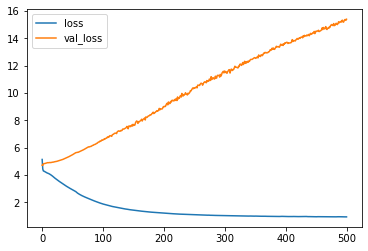

In [31]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [32]:
input_test = Input(shape=(1))
x_test = embedding_layer(input_test)
h_t = Input(shape=(LATENT_DIM,))
c_t = Input(shape=(LATENT_DIM,))
x_test,h,c = lstm(x_test,initial_state=[h_t,c_t])
output_test = dense(x_test)

model_test = Model([input_test,h_t,c_t],[output_test,h,c])


In [33]:
idx2word = {v:k for k,v in word2idx.items()}

In [34]:
while True:
    gen_poem()
    print('------------------')
    more = input('Generate Poem [Y/n]: ')
    if more.lower()=='n':
        break
    print('-------------------')

وَلَيسَ لِخَلقٍ مِن مُداراتِها بُدُّ
فَقَصَّرَ عَن لَحاقي في المَعالي
بِما يَجزي بِهِ الخَيلَ العِتاقا
وَيَحظى بِالغِنى وَالمالِ دوني
------------------
Generate Poem [Y/n]: Y
-------------------
إِن تَكُن تَشكو لِأَوجاعِ الهَوى
بِأَطرافِ المُثَقَّفَةِ العَوالي
يَعدونَ بِالمُستَلئِمينَ عَوابِس
وَلَو أَرسَلتُ رُمحي مَع جَبانٍ
------------------
Generate Poem [Y/n]: Y
-------------------
وَقَد غَنّى عَلى الأَغصانِ طَيرٌ
أَغَنُّ مَليحُ الدَلِّ أَحوَرُ أَكحَلٌ
ضَجّوا فَصُحتُ عَلَيهِمُ أَلفَ ضَربَه مُخبِر وَأَبي القَسطَلِ فَاِندُبي
وَقَد عايَنتَ مِن خَبري الفِعالا
------------------
Generate Poem [Y/n]: Y
-------------------
تَراهُ بِتَفريجِ الأُمورِ وَلَفِّه
قَصيرَةٌ عَنكَ فَالأَيّامُ تَنقَلِبُ
وَخَلَّينا نِسائَهُمُ حَيارى حينِ
سِوى كَبِدٍ حَرّى تَذوبُ فَأَسقَمُ
------------------
Generate Poem [Y/n]: n


In [35]:
while True:
    gen_poem_no_norm()
    print('------------------')
    more = input('Generate Poem [Y/n]: ')
    if more.lower()=='n':
        break
    print('-------------------')

أَلا مَن لِأَمرٍ حازِمٍ قَد بَدا لِيا
فَدَعَوني مِن بَعدِ أَنتَ تَعُدُّ نَفسَكَ سَيِّد مَوهِن
إِلّا المُدَرَّعَ بَينَ عَرينَةِ الأَشبالِ
يا أَيُّها المَلِكُ الَّذي راحاتُهُ
------------------
Generate Poem [Y/n]: Y
-------------------
وَخَبِّر عَن عُبَيلَةَ العِدا أَمُت مُنقَطِعِ مُضيئَةٌ
عَرَكتُ نَوائِبَ الأَيّامِ حَتّى
تَهُزُّ سُمرَ القَنا حِقداً عَلَيَّ بِمُهَنَّدٍ
لِأَنّي فارِسٌ مِن نَسلِ حامِ
------------------
Generate Poem [Y/n]: Y
-------------------
وَخُذي وَسَيفي طَلَلٌ بِالرَقمَتَينِ الغَربُ اِستَمتُ وَالخَفَرِ
هَزَمتُ تَميماً ثُمَّ جَندَلتُ كَبشَهُم
إِلّا عَلى مَوكِبٍ كَاللَيلِ مُحتَبِكِ صَبر
وَذَكَّرَني المَنازِلَ وَالمَغاني
------------------
Generate Poem [Y/n]: n


In [36]:
# very good results
# very consistent though the loss is greater
# also maybe with more tunining we can reach a better loos
# very happy to get the first shatr of my favourite line
# أَغَنُّ مَليحُ الدَلِّ أَحوَرُ أَكحَلٌ       أَزَجُّ نَقِيُّ الخَدِّ أَبلَجُ أَدعَجُ
# we got the second shatr from the previous model
# note : tried these again with sparse categorical cross entropy
# so we took the padding into consideration for the loss
# got very good results (probably even better than this, more correct lines)
# but did not get my favourite line so keeping this :)

<h1>code</h1>

In [20]:
# now for the main course
# neural machine translation
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,LSTM,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.utils import shuffle

In [21]:
BATCH_SIZE = 64  
EPOCHS = 100  
LATENT_DIM_ENCODER = LATENT_DIM_DECODER = 256 # these need to be the same
NUM_SAMPLES = 15000  
MAX_SEQ_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM_ENCODER = 300 # these can differ
EMBEDDING_DIM_DECODER = 300 # for arabic we only have a D = 300 file
VALIDATION_SPLIT = 0.2

In [22]:
# first we load in the data
# the input to encoder will be the sentences in english
# the input & targets of decoder are the arabic sentences with the <sos> & <eos> tags

input_encoder = [] # english sentences
input_decoder = [] # <sos> + arabic sentences
targets_decoder = [] # arabic sentences + <eos>

for i,line in enumerate(open('datasets/Tab-delimited Bilingual Sentence Pairs/ara.txt',encoding='utf8')):
    if i == NUM_SAMPLES:
        break
    line = line.rstrip()
    if not line:
        continue
    eng,ara,other = line.split('\t')
    input_encoder.append(eng)
    input_decoder.append('<sos> '+ara)
    targets_decoder.append(ara+' <eos>')        

In [23]:
# next we tokenise sentences
# first we tokenise english sentneces

# no <sos> or <eos> tags in english
# also in arabic sentences, no sos or eos words ( IMPORTANT : already checkd)
# so we can filter the data, our tags will be sos and eos
# we need to do this because we will use pretrained word embeddings 
# at both our encoder and decoder
# if a word is Hi. , it wont receive the word vector for Hi
# of course we can do some extra work, but still they will be different words
# so better to remove special characters

tokeniser_encoder = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser_encoder.fit_on_texts(input_encoder)
input_encoder = tokeniser_encoder.texts_to_sequences(input_encoder)
word2idx_eng = tokeniser_encoder.word_index

# again for arabic sentences
# this is the decoder part, same code as above

tokeniser_decoder = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser_decoder.fit_on_texts(input_decoder+targets_decoder)
input_decoder = tokeniser_decoder.texts_to_sequences(input_decoder)
targets_decoder = tokeniser_decoder.texts_to_sequences(targets_decoder)
word2idx_ara = tokeniser_decoder.word_index

In [24]:
# next is padding

# pad english sentences
max_seq_length_encoder = max(len(sentence) for sentence in input_encoder)
max_seq_length_encoder = min(max_seq_length_encoder,MAX_SEQ_LENGTH)

input_encoder = pad_sequences(input_encoder,maxlen=max_seq_length_encoder,padding='post')

# pad arabic sentences
max_seq_length_decoder = max(len(sentence) for sentence in input_decoder)
max_seq_length_decoder = min(max_seq_length_decoder,MAX_SEQ_LENGTH)

input_decoder = pad_sequences(input_decoder,maxlen=max_seq_length_decoder,padding='post')
targets_decoder = pad_sequences(targets_decoder,maxlen=max_seq_length_decoder,padding='post')

In [6]:
# next is load in pretrained word embeddings for both english and arabic
# and form our embeddings layer for encoder & decoder

# first english/encoder embedding layer
# we use GloVe

# load in the pre trained word vectors
file = 'datasets/glove/glove.6B.'+str(EMBEDDING_DIM_ENCODER)+'d.txt'
word2vec_eng = {}
for line in open(file,encoding='utf8'):
    line = line.split()
    word = line[0]
    if word in word2idx_eng:
        vec = np.asarray(line[1:],dtype='float32')
        word2vec_eng[word] = vec

V_eng = min(len(word2idx_eng)+1,MAX_VOCAB_SIZE)

# now lets create our embedding matrix
embedding_eng = np.zeros((V_eng,EMBEDDING_DIM_ENCODER))

# now we fill the matrix with the pretrained word embeddings
# if a word is not in our pretrained vectors , we leave it as zeros

for word,idx in word2idx_eng.items():
    vec = word2vec_eng.get(word,0)
    if idx < V_eng:
        embedding_eng[idx] = vec


In [7]:
# next arabic/decoder embedding layer
# we use fast-text vectors from previous example
# takes some time, 2M words

# load in pretrained word vectors
word2vec_ara = {}
for line in open('datasets/fasttext ara/cc.ar.300.vec',encoding='utf8'):
    line = line.split()
    word = line[0]
    if word in word2idx_ara:
        vec = np.asarray(line[1:],dtype='float32')
        word2vec_ara[word] = vec

V_ara = min(len(word2idx_ara)+1,MAX_VOCAB_SIZE)
# now lets create our embedding matrix
embedding_ara = np.zeros((V_ara,EMBEDDING_DIM_DECODER))

# now we fill the matrix with the pretrained word embeddings
# if a word is not in our pretrained vectors , we leave it as zeros

for word,idx in word2idx_ara.items():
    vec = word2vec_ara.get(word,0)
    if idx < V_ara:
        embedding_ara[idx] = vec

        

In [8]:
# create encoder embedding layer
embedding_encoder = Embedding(
    V_eng,
    EMBEDDING_DIM_ENCODER,
    weights = [embedding_eng],
)

# create decoder embedding layers
embedding_decoder = Embedding(
    V_ara,
    EMBEDDING_DIM_DECODER,
    weights = [embedding_ara],
)

In [9]:
# now we are ready to build our model

# first the encoder

input_encoder_tf = Input(shape=(max_seq_length_encoder)) # NxT
x_encoder = embedding_encoder(input_encoder_tf) # NxTxD
# we need only hT
lstm_encoder = LSTM(LATENT_DIM_ENCODER,return_state = True,return_sequences=False)
# we dont need the output of encoder
_,hT_encoder,cT_encoder = lstm_encoder(x_encoder) # NxLATENT_DIM , LATENT_DIM , LATENT_DIM
# this finished our encoder
# now for the decoder, same as before , with encoder output being decoder inputs

input_decoder_tf = Input(shape=(max_seq_length_decoder)) # NxT
x_decoder = embedding_decoder(input_decoder_tf) # NxTxD
# we will need hs and cs while testing/translating
lstm_decoder = LSTM(LATENT_DIM_DECODER,return_sequences=True,return_state=True)
x_decoder,_,_ = lstm_decoder(x_decoder,initial_state=[hT_encoder,cT_encoder])
# then we have a dense layer
dense = Dense(V_ara,activation='softmax')
output_decoder = dense(x_decoder)
model = Model([input_encoder_tf,input_decoder_tf],output_decoder)

In [10]:
# shuffle data
# VERY IMPORTANT
# when the data was shuffled, I noticed a huge imporve in val metrics
# apparently what tensorflow does,
# is that that when model.fit splits the data into train and val, 
# it takes the validation data FROM THE LAST SAMPLES BEFORE SHUFFLING (check the documentation)
# unfortunately, our data file has sentences sorted in order of length
# so first sentences are short, later sentences are longer
# so our validation dataset had longer sentences thatn our trian which caused the problem
input_encoder,input_decoder,targets_decoder = shuffle(input_encoder,input_decoder,targets_decoder)

In [11]:
# Compile the model and train it
# the instructor chose not to filter out padding this time
# when trying to take the one-hot approach, we got bad results
# seems its up to the data to decide our approach
model.compile(
  optimizer='rmsprop',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [12]:
r = model.fit(
    [input_encoder,input_decoder],targets_decoder,
    batch_size = BATCH_SIZE,
    epochs=EPOCHS,
    validation_split = VALIDATION_SPLIT
)

Epoch 1/100
146/146 [==============================] - 196s 1s/step - loss: 2.3164 - accuracy: 0.8289 - val_loss: 0.9675 - val_accuracy: 0.8864
Epoch 2/100
146/146 [==============================] - 183s 1s/step - loss: 0.9477 - accuracy: 0.8843 - val_loss: 0.9374 - val_accuracy: 0.8887
Epoch 3/100
146/146 [==============================] - 179s 1s/step - loss: 0.9060 - accuracy: 0.8856 - val_loss: 0.9099 - val_accuracy: 0.8912
Epoch 4/100
146/146 [==============================] - 178s 1s/step - loss: 0.8463 - accuracy: 0.8912 - val_loss: 0.8935 - val_accuracy: 0.8928
Epoch 5/100
146/146 [==============================] - 176s 1s/step - loss: 0.8227 - accuracy: 0.8921 - val_loss: 0.8743 - val_accuracy: 0.8944
Epoch 6/100
146/146 [==============================] - 173s 1s/step - loss: 0.7892 - accuracy: 0.8937 - val_loss: 0.8572 - val_accuracy: 0.8961
Epoch 7/100
146/146 [==============================] - 173s 1s/step - loss: 0.7533 - accuracy: 0.8967 - val_loss: 0.8403 - val_accuracy:

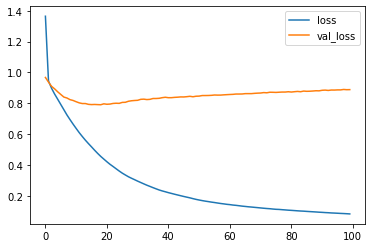

In [13]:
# loses
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

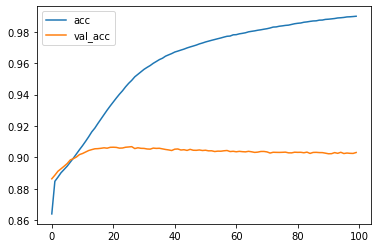

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [17]:
# now lets make our test model

# first we make the encoder
encoder_model = Model(input_encoder_tf,[hT_encoder,cT_encoder])

# next we make the test decoder
input_decoder_test = Input(shape=(1))
hT_from_encoder = Input(shape=(LATENT_DIM_ENCODER,))
cT_from_encoder = Input(shape=(LATENT_DIM_ENCODER,))

x_decoder_test = embedding_decoder(input_decoder_test)
# now we need the hidden & cell states
x_decoder_test,h_t_decoder_test,c_t_decoder_test = lstm_decoder(x_decoder_test,initial_state=[hT_from_encoder,cT_from_encoder])
output_decoder_test = dense(x_decoder_test)

translator = Model([input_decoder_test,hT_from_encoder,cT_from_encoder],[output_decoder_test,h_t_decoder_test,c_t_decoder_test])

In [90]:
# lets make a function that translates sentences
# input is a normal sentence
idx2word_ara = {v:k for k,v in word2idx_ara.items()}
def translate(eng_sentence):
    # tokensie and pad sentence
    eng_sentence = tokeniser_encoder.texts_to_sequences([eng_sentence])
    eng_sentence = pad_sequences(eng_sentence,maxlen=max_seq_length_encoder,padding='post')
    # now pass sentence through encoder
    h_t_translate,c_t_translate = encoder_model(eng_sentence)
    
    ara_sentence = []
    word = word2idx_ara['sos']
    word = np.array(word).reshape(1,1)

    # next we predict word by word
    for t in range(max_seq_length_decoder):
        probs,h_t_translate,c_t_translate = translator([word,h_t_translate,c_t_translate])
        # get probabilities
        probs = np.squeeze(probs)
        word_idx = np.argmax(probs)
        # get word
        word = idx2word_ara[word_idx]
        if word == 'eos':
            break
        else:
            ara_sentence.append(word)
            # make current word x
            word = np.array(word_idx).reshape(1,1)
    return ' '.join(ara_sentence)        

In [91]:
# lets try sentences from our dataset
eng_ara = [line.rstrip().split('\t')[:2] for line in open('datasets/Tab-delimited Bilingual Sentence Pairs/ara.txt',encoding='utf8')]

while True:
    idx = np.random.choice(len(eng_ara))
    eng,ara = eng_ara[idx]
    trans = translate(eng)
    print(eng)
    print(ara)
    print('translation : ',trans)
    resp = input('Continue [Y/n] : ')
    if resp.lower().startswith('n'):
        break
    print('-------------------------')

How many horses does Tom own?
كم حصانا لدى توم؟
translation :  كم حصانا لدى توم؟
Continue [Y/n] : Y
-------------------------
Welcome back. We missed you.
أهلاً بعودتك. لقد اشتقنا إليك!
translation :  أهلاً بعودتك لقد اشتقنا إليك
Continue [Y/n] : Y
-------------------------
Don't forget to turn off the light.
لا تنس إطفاء الأضواء.
translation :  لا تنس إطفاء الأضواء
Continue [Y/n] : Y
-------------------------
Tom opened the door and asked Mary if she was busy.
فتح توم الباب وسأل فيما إذا كانت ماريا مشغولة.
translation :  فتح توم الباب وسأل فيما إذا كانت ماريا مشغولة
Continue [Y/n] : Y
-------------------------
I like sports.
أحب الرياضة.
translation :  أحب ممارسة الألعاب الرياضية
Continue [Y/n] : Y
-------------------------
My daughter is getting married in June.
ستتزوج ابنتي في يونيو
translation :  لقد حضر الاجتماع لي دعنا وصل
Continue [Y/n] : Y
-------------------------
Let me see it.
دعني أراها.
translation :  دعني أراها
Continue [Y/n] : Y
-------------------------
Let's forget tha

In [106]:
# as we can we get excellent results
# whats interesting is that our model gets some sentences right, but not all the sentence
# this means that the model is learning something rather than just memorising
# within our limited dataset (10K - sentences 1-37 words), its expexted for the model to overfit
# so a larger dataset might result in better results